# Research the correlation between PFT and lung volume

I will create a dict including the lung volume and PFT of each patient.
PFT has 4 absolute values and 4 percentage values, while lung volume has 1 value.
so there would be totally 8 * 1 = 8 combinations. 


In [54]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
import itk
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.morphology import disk,diamond,rectangle,square,erosion,dilation,opening,closing,skeletonize
import pickle
import pandas as pd
import json


In [4]:
pft_fpath = '/home/jjia/data/dataset/lung_function/SScBaseline_PFT_anonymized.xlsx'  # id from 0068800 to 99..., total 333 cases
label_excel = pd.read_excel(pft_fpath, engine='openpyxl')
label_excel = label_excel.sort_values(by=['subjectID'])


In [5]:
label_excel

,subjectID,scandate,TLC_Lres,DateDF_abs,ScanDate,PFT Date,Date of Birth,Gender,Age,Height,...,FEV 1 % FVC,FEV 1 % VC,FVC,FVC/pred,FVC/predNew,VC in,TLC_He,TLC/pred,Remarks,"Remarks_Jingnan: yellow means NV, red means ""obtained by guess by JIngnan"""
122,SSc_patient_0068800,20110701,YES,1.0,2011-07-01,2011-06-30,1951-12-07,female,60.0,1.81,...,80.020,75.716,4.363,122.271109,108,4.426,6.261,101.705653,NaN,NaN
123,SSc_patient_0127512,20091127,YES,1.0,2009-11-27,2009-11-26,1931-03-07,female,78.0,1.56,...,75.849,69.643,2.076,104.175030,88,2.129,3.864,85.752330,NaN,NaN
124,SSc_patient_0139552,20121102,YES,1.0,2012-11-02,2012-11-01,1939-06-17,female,73.0,1.71,...,74.090,72.354,3.544,127.148136,115,3.558,5.781,105.185590,NaN,NaN
125,SSc_patient_0143788,20090529,YES,0.0,2009-05-28,2009-05-28,1942-09-12,female,68.0,1.70,...,NaN,80.370,2.860,98.000000,87,2.820,3.970,73.000000,Geen FEV1/FVC,NaN
126,SSc_patient_0152440,20100604,YES,1.0,2010-06-04,2010-06-03,1946-12-23,female,64.0,1.60,...,80.213,77.897,2.994,118.153118,101,2.989,4.525,94.863732,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SSc_patient_9523013,20090904,YES,1.0,2009-09-04,2009-09-03,1978-10-01,male,31.0,1.80,...,84.826,83.748,4.117,78.839525,80,4.003,5.214,71.405094,NaN,NaN
121,SSc_patient_9662556,20120921,NO,1.0,2012-09-21,2012-09-20,1984-02-19,female,28.0,1.71,...,84.480,84.480,4.340,109.670735,102,4.109,5.188,94.395924,NaN,NaN
330,SSc_patient_9861781,20090417,YES,1.0,2009-04-17,2009-04-16,1958-03-03 00:00:00,male,51.0,1.77,...,NaN,78.170,4.900,108.000000,100,4.950,6.120,87.000000,FEV1/FVC niet gemeten,NaN
331,SSc_patient_9934096,20100122,YES,1.0,2010-01-22,2010-01-21,1941-02-02,female,69.0,1.57,...,76.032,76.032,2.706,119.149311,102,2.626,4.673,102.209099,NaN,NaN


## Calculate lung volume and save them to a file

In [6]:
data_dir = '/home/jjia/data/dataset/lung_function/iso1.5'

lung_files = glob(data_dir + '/*LungMask.nii.gz')

In [8]:
len(lung_files)

317

In [ ]:
def get_lung_volume(lung, sp):
    

In [16]:
volume_ls = []
for i in lung_files:
    lung, ori, sp = load_itk(i, require_ori_sp=True)
    lung_volume = np.sum(lung)
    volume_ls.append([i.split('SSc_patient_')[-1][:7], lung_volume])


In [38]:
volume_dt = {i[0]: i[1] for i in volume_ls}

In [39]:
volume_dt

{'1066422': 2292516,
 '7325831': 2856852,
 '5112278': 2160221,
 '2396084': 2118493,
 '2087864': 1615793,
 '1947009': 2770550,
 '1244023': 2565006,
 '5174713': 1732482,
 '3901150': 1477403,
 '8909491': 3730658,
 '7628640': 1547758,
 '0152440': 1789790,
 '3588476': 2196804,
 '7135410': 1428902,
 '9071115': 2970838,
 '8238603': 2952504,
 '1329821': 1950307,
 '8278747': 1895300,
 '8221364': 1249219,
 '5289050': 1301011,
 '6224742': 1610459,
 '6145432': 1882670,
 '0222357': 1907388,
 '4084886': 1905159,
 '0315573': 2606187,
 '1239567': 2008112,
 '2178130': 1483942,
 '0277377': 1674891,
 '6960927': 2841607,
 '4280811': 2311513,
 '6180838': 1860458,
 '5235284': 1778711,
 '7234049': 2525989,
 '9095122': 1705813,
 '2323272': 1717373,
 '3729608': 2141906,
 '5262908': 1830925,
 '1945530': 2630698,
 '1513875': 3060653,
 '6351267': 1365332,
 '3261564': 1080100,
 '1397732': 1799067,
 '3298040': 2838783,
 '9662556': 1874114,
 '2340524': 2099620,
 '6503304': 1103158,
 '8784276': 1980962,
 '6226529': 1

In [17]:
volume_ls

[['1066422', 2292516],
 ['7325831', 2856852],
 ['5112278', 2160221],
 ['2396084', 2118493],
 ['2087864', 1615793],
 ['1947009', 2770550],
 ['1244023', 2565006],
 ['5174713', 1732482],
 ['3901150', 1477403],
 ['8909491', 3730658],
 ['7628640', 1547758],
 ['0152440', 1789790],
 ['3588476', 2196804],
 ['7135410', 1428902],
 ['9071115', 2970838],
 ['8238603', 2952504],
 ['1329821', 1950307],
 ['8278747', 1895300],
 ['8221364', 1249219],
 ['5289050', 1301011],
 ['6224742', 1610459],
 ['6145432', 1882670],
 ['0222357', 1907388],
 ['4084886', 1905159],
 ['0315573', 2606187],
 ['1239567', 2008112],
 ['2178130', 1483942],
 ['0277377', 1674891],
 ['6960927', 2841607],
 ['4280811', 2311513],
 ['6180838', 1860458],
 ['5235284', 1778711],
 ['7234049', 2525989],
 ['9095122', 1705813],
 ['2323272', 1717373],
 ['3729608', 2141906],
 ['5262908', 1830925],
 ['1945530', 2630698],
 ['1513875', 3060653],
 ['6351267', 1365332],
 ['3261564', 1080100],
 ['1397732', 1799067],
 ['3298040', 2838783],
 ['9662556'

In [22]:
df = pd.DataFrame(np.array(volume_ls), columns=['pat_id', 'lung_volume'])

In [23]:
df

,pat_id,lung_volume
0,1066422,2292516
1,7325831,2856852
2,5112278,2160221
3,2396084,2118493
4,2087864,1615793
...,...,...
312,0573200,2560143
313,9934096,2022743
314,1301116,3276763
315,5453856,1138501


In [40]:
df_new = pd.DataFrame(columns=['pat_id', 'lung_volume', 'DLCO', 'FEV1', 'FVC', 'TLC'])

In [31]:
pat_id_ls = [i[0] for i in volume_ls]
len(pat_id_ls)

317

In [32]:
for i in label_excel:
    print(i)

subjectID
scandate
TLC_Lres
DateDF_abs
ScanDate
PFT Date
Date of Birth
Gender
Age
Height
Weight
DLCO_SB
DLCO_SB / VA
DLCOc_SB
DLCOc/pred
DLCOc_SB / VA
FEV1
FEV1/pred
FEV 1 % FVC
FEV 1 % VC
FVC
FVC/pred
FVC/predNew
VC in
TLC_He
TLC/pred
Remarks
Remarks_Jingnan: yellow means NV, red means "obtained by guess by JIngnan"


In [44]:
i = 0
for idx, row in label_excel.iterrows():
    id = row['subjectID'].split('SSc_patient_')[-1][:7]
    if id in pat_id_ls:
        
        df_new.loc[i] = [id, volume_dt[id]/1e6, row['DLCO_SB'], row['FEV1'], row['FVC'], row['TLC_He']]
        i += 1
    # print(idx, row['subjectID'])

In [45]:
df_new

,pat_id,lung_volume,DLCO,FEV1,FVC,TLC
0,0068800,2.273472,7.331,3.491,4.363,6.261
1,0127512,1.464888,3.944,1.575,2.076,3.864
2,0139552,2.676405,5.295,2.626,3.544,5.781
3,0143788,1.615487,1.240,2.260,2.860,3.970
4,0152440,1.78979,7.103,2.402,2.994,4.525
...,...,...,...,...,...,...
312,9523013,2.390385,6.753,3.492,4.117,5.214
313,9662556,1.874114,6.641,3.666,4.340,5.188
314,9861781,2.147462,5.380,3.870,4.900,6.120
315,9934096,2.022743,4.621,2.057,2.706,4.673


In [49]:
df_new['lung_volume'] = df_new['lung_volume'].astype(float)

In [50]:
df_new.corr()

,lung_volume,DLCO,FEV1,FVC,TLC
lung_volume,1.000000,0.502433,0.613479,0.724854,0.820586
DLCO,0.502433,1.000000,0.799805,0.779263,0.709412
FEV1,0.613479,0.799805,1.000000,0.940039,0.808512
FVC,0.724854,0.779263,0.940039,1.000000,0.907825
TLC,0.820586,0.709412,0.808512,0.907825,1.000000


<AxesSubplot: >

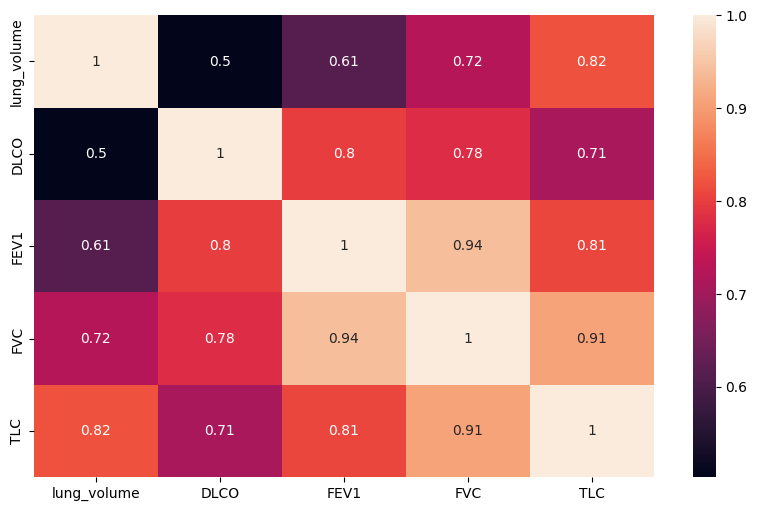

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_new.corr(), ax=ax, annot=True)

## Recalculate again only for the testing dataset

In [56]:
with open('/home/jjia/data/lung_function/lung_function/modules/data_split.json', "r") as f:
    data_split = json.load(f)

test = data_split[f'test']

In [58]:
i = 0
for idx, row in label_excel.iterrows():
    id = row['subjectID'].split('SSc_patient_')[-1][:7]
    if id in test:
        
        df_new.loc[i] = [id, volume_dt[id]/1e6, row['DLCO_SB'], row['FEV1'], row['FVC'], row['TLC_He']]
        i += 1
    # print(idx, row['subjectID'])

In [59]:
df_new['lung_volume'] = df_new['lung_volume'].astype(float)

In [60]:
df_new.corr()

,lung_volume,DLCO,FEV1,FVC,TLC
lung_volume,1.000000,0.510231,0.586929,0.709737,0.813103
DLCO,0.510231,1.000000,0.808049,0.793893,0.713608
FEV1,0.586929,0.808049,1.000000,0.941766,0.795021
FVC,0.709737,0.793893,0.941766,1.000000,0.902133
TLC,0.813103,0.713608,0.795021,0.902133,1.000000


<AxesSubplot: >

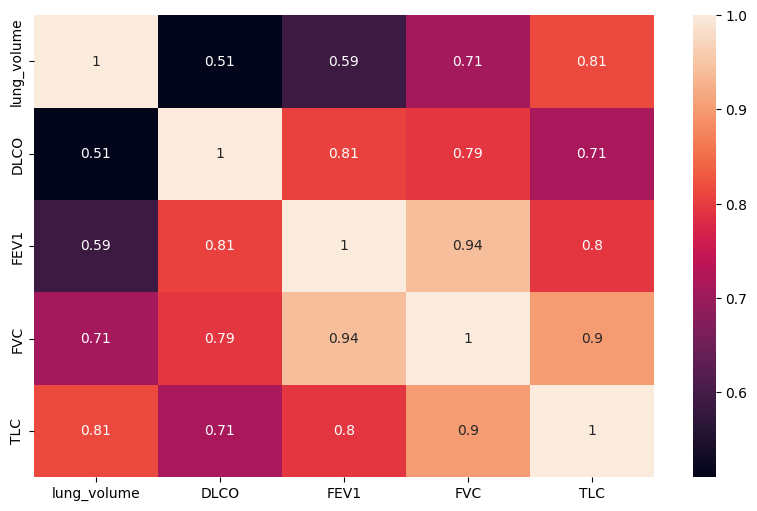

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_new.corr(), ax=ax, annot=True)